In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# set input directory
input_dir = 'input'

In [3]:
# set dataset file name
input_data_file = 'data.xlsx'

In [4]:
# display list of files in input directory
os.listdir('input')

['airquality.csv', 'data.xlsx', 'labeled_data.csv']

In [5]:
# to get the input data path
data_path = os.path.join(os.curdir,input_dir,input_data_file)
data_path

'.\\input\\data.xlsx'

In [6]:
# to read data from excel file
raw_data = pd.read_excel(data_path)

In [7]:
raw_data.head()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
0,16,2.1,0.79,0.14,1.2,16,17,37,177,78x,57,12
1,16,2.1,0.8,0.15,1.3,16,17,36,178,77x,57,11
2,16,2.1,0.71,0.13,1,13,14,38,163,72x,57,8
3,15,2,0.66,0.12,0.8,11,12,39,147,65x,58,6.5
4,15,2,0.53,0.11,0.6,10,11,38,131,56x,58,5.5


In [8]:
len(raw_data)

218639

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
TEMP     200169 non-null object
CH4      95822 non-null object
CO       217310 non-null object
NMHC     95614 non-null object
NO       217227 non-null object
NO2      216681 non-null object
NOx      217228 non-null object
O3       199864 non-null object
PM10     215761 non-null object
PM2.5    215768 non-null object
RH       200243 non-null object
SO2      217046 non-null object
dtypes: object(12)
memory usage: 20.0+ MB


In [10]:
raw_data.columns

Index(['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5',
       'RH', 'SO2'],
      dtype='object')

In [11]:
raw_data.isna().sum()

TEMP      18470
CH4      122817
CO         1329
NMHC     123025
NO         1412
NO2        1958
NOx        1411
O3        18775
PM10       2878
PM2.5      2871
RH        18396
SO2        1593
dtype: int64

In [12]:
# drop rows which contains nan
raw_data.dropna(axis = 0, inplace=True)

In [13]:
raw_data.isna().sum()

TEMP     0
CH4      0
CO       0
NMHC     0
NO       0
NO2      0
NOx      0
O3       0
PM10     0
PM2.5    0
RH       0
SO2      0
dtype: int64

In [14]:
def numeric(row):
    try:
        if np.isnan(row):
            return
        else:
            row =str(row)
            return float(row.replace('x','').replace('#','').replace('*',''))
    except TypeError:
        row =str(row)
        return float(row.replace('x','').replace('#','').replace('*',''))

In [15]:
raw_data['O3'] = raw_data['O3'].apply(numeric)
#print(raw_data['NO'].describe())

In [16]:
raw_data['PM2.5'] = raw_data['PM2.5'].apply(numeric)
raw_data['TEMP'] = raw_data['TEMP'].apply(numeric)
raw_data['CH4'] = raw_data['CH4'].apply(numeric)
raw_data['CO'] = raw_data['CO'].apply(numeric)
raw_data['NMHC'] = raw_data['NMHC'].apply(numeric)
raw_data['NO'] = raw_data['NO'].apply(numeric)
raw_data['NO2'] = raw_data['NO2'].apply(numeric)
raw_data['NOx'] = raw_data['NOx'].apply(numeric)
raw_data['PM10'] = raw_data['PM10'].apply(numeric)
raw_data['RH'] = raw_data['RH'].apply(numeric)
raw_data['SO2'] = raw_data['SO2'].apply(numeric)

In [17]:
len(raw_data)

77393

In [18]:
raw_data = raw_data[0:1000]

In [19]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1016
Data columns (total 12 columns):
TEMP     1000 non-null float64
CH4      1000 non-null float64
CO       1000 non-null float64
NMHC     1000 non-null float64
NO       1000 non-null float64
NO2      1000 non-null float64
NOx      1000 non-null float64
O3       1000 non-null float64
PM10     1000 non-null float64
PM2.5    1000 non-null float64
RH       1000 non-null float64
SO2      1000 non-null float64
dtypes: float64(12)
memory usage: 101.6 KB


In [20]:
raw_data.describe()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,16.241900,2.026500,0.662960,0.259000,7.960200,23.093900,31.035400,25.253400,62.664000,28.149000,69.034000,3.1806
std,2.614944,0.150633,0.431041,0.253451,14.863333,11.833303,23.398359,13.571215,223.360648,40.296558,12.532115,2.2106
min,7.900000,1.800000,0.180000,0.050000,-0.400000,3.400000,3.900000,0.000000,0.000000,0.000000,32.000000,-0.2000
25%,14.750000,2.000000,0.420000,0.130000,1.800000,14.750000,17.000000,16.000000,29.000000,12.000000,59.000000,1.6000
50%,16.000000,2.000000,0.570000,0.190000,3.900000,22.000000,26.000000,26.000000,46.000000,23.000000,68.000000,2.5000
75%,18.000000,2.000000,0.770000,0.290000,7.100000,30.000000,38.000000,35.000000,70.000000,37.000000,80.000000,4.0250
max,24.000000,3.300000,5.900000,3.270000,212.000000,70.000000,268.000000,68.000000,5004.000000,840.000000,98.000000,19.0000


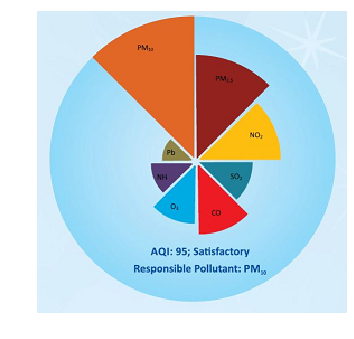

In [21]:
plt.figure(figsize=(12,5), dpi=80)
image = plt.imread('img/significance.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [22]:
temp_data = raw_data[['TEMP','RH','CH4','NMHC','NO', 'NOx']]

In [23]:
# axis = 1 : columnwise operation
data = raw_data.drop(columns=['TEMP','RH','CH4','NMHC','NO', 'NOx'],axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2
0,0.79,16.0,37.0,177.0,78.0,12.0
1,0.80,16.0,36.0,178.0,77.0,11.0
2,0.71,13.0,38.0,163.0,72.0,8.0
3,0.66,11.0,39.0,147.0,65.0,6.5
4,0.53,10.0,38.0,131.0,56.0,5.5


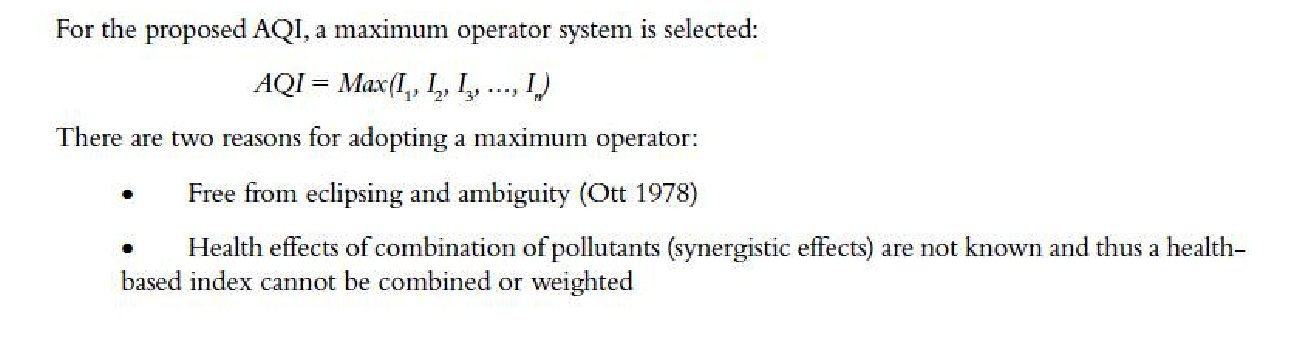

In [24]:
plt.figure(figsize=(20,10), dpi=80)
image = plt.imread('img/aqi.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [25]:
data['AQI']= data.max(axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,AQI
0,0.79,16.0,37.0,177.0,78.0,12.0,177.0
1,0.80,16.0,36.0,178.0,77.0,11.0,178.0
2,0.71,13.0,38.0,163.0,72.0,8.0,163.0
3,0.66,11.0,39.0,147.0,65.0,6.5,147.0
4,0.53,10.0,38.0,131.0,56.0,5.5,131.0


In [26]:
data['AQI'].describe()

count    1000.000000
mean       65.131000
std       222.964107
min        17.000000
25%        33.000000
50%        46.000000
75%        70.000000
max      5004.000000
Name: AQI, dtype: float64

In [27]:
aqi = data['AQI']
#aqi

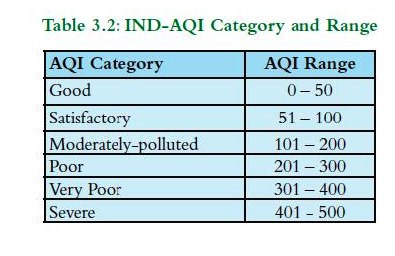

In [28]:
plt.figure(figsize=(12,5), dpi=60)
image = plt.imread('img/table.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [29]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 150)] = 2
aqi[(aqi > 150) & (aqi <= 200)] = 3
aqi[(aqi > 200)] = 4

In [30]:
aqi.unique()

array([3., 2., 1., 0., 4.])

In [31]:
data['label'] = data['AQI'].astype('int8')

In [32]:
data.drop(columns=['AQI'], axis= 1, inplace=True)

In [33]:
data.tail()

,CO,NO2,O3,PM10,PM2.5,SO2,label
1012,0.62,37.0,1.8,82.0,46.0,9.3,1
1013,0.72,42.0,3.2,83.0,48.0,10.0,1
1014,1.18,46.0,4.8,89.0,52.0,11.0,1
1015,1.13,33.0,23.0,95.0,53.0,8.2,1
1016,0.63,16.0,47.0,88.0,46.0,4.8,1


In [34]:
temp_data.head()

,TEMP,RH,CH4,NMHC,NO,NOx
0,16.0,57.0,2.1,0.14,1.2,17.0
1,16.0,57.0,2.1,0.15,1.3,17.0
2,16.0,57.0,2.1,0.13,1.0,14.0
3,15.0,58.0,2.0,0.12,0.8,12.0
4,15.0,58.0,2.0,0.11,0.6,11.0


In [35]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1016
Data columns (total 6 columns):
TEMP    1000 non-null float64
RH      1000 non-null float64
CH4     1000 non-null float64
NMHC    1000 non-null float64
NO      1000 non-null float64
NOx     1000 non-null float64
dtypes: float64(6)
memory usage: 54.7 KB


In [36]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016],
           dtype='int64', length=1000)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1016
Data columns (total 7 columns):
CO       1000 non-null float64
NO2      1000 non-null float64
O3       1000 non-null float64
PM10     1000 non-null float64
PM2.5    1000 non-null float64
SO2      1000 non-null float64
label    1000 non-null int8
dtypes: float64(6), int8(1)
memory usage: 55.7 KB


In [38]:
data = temp_data.join(data)

In [39]:
data.head(30)

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2
5,14.0,57.0,2.0,0.11,0.8,12.0,0.50,11.0,37.0,112.0,46.0,5.7,2
6,14.0,57.0,2.0,0.14,1.4,19.0,0.57,18.0,29.0,103.0,45.0,5.8,2
7,14.0,56.0,2.0,0.14,2.3,20.0,0.61,17.0,27.0,104.0,42.0,6.5,2
8,14.0,53.0,2.0,0.13,2.9,18.0,0.59,15.0,29.0,111.0,45.0,6.8,2
9,14.0,50.0,2.0,0.14,4.1,20.0,0.60,16.0,29.0,111.0,46.0,5.9,2


In [40]:
# save the labeled data
data.to_csv('input/labeled_data.csv',index=False)

# Data Preprocessing and Labeling Completed

# Data Analysis

In [41]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


In [42]:
data.describe()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,16.241900,69.034000,2.026500,0.259000,7.960200,31.035400,0.662960,23.093900,25.253400,62.664000,28.149000,3.1806,0.541000
std,2.614944,12.532115,0.150633,0.253451,14.863333,23.398359,0.431041,11.833303,13.571215,223.360648,40.296558,2.2106,0.669901
min,7.900000,32.000000,1.800000,0.050000,-0.400000,3.900000,0.180000,3.400000,0.000000,0.000000,0.000000,-0.2000,0.000000
25%,14.750000,59.000000,2.000000,0.130000,1.800000,17.000000,0.420000,14.750000,16.000000,29.000000,12.000000,1.6000,0.000000
50%,16.000000,68.000000,2.000000,0.190000,3.900000,26.000000,0.570000,22.000000,26.000000,46.000000,23.000000,2.5000,0.000000
75%,18.000000,80.000000,2.000000,0.290000,7.100000,38.000000,0.770000,30.000000,35.000000,70.000000,37.000000,4.0250,1.000000
max,24.000000,98.000000,3.300000,3.270000,212.000000,268.000000,5.900000,70.000000,68.000000,5004.000000,840.000000,19.0000,4.000000


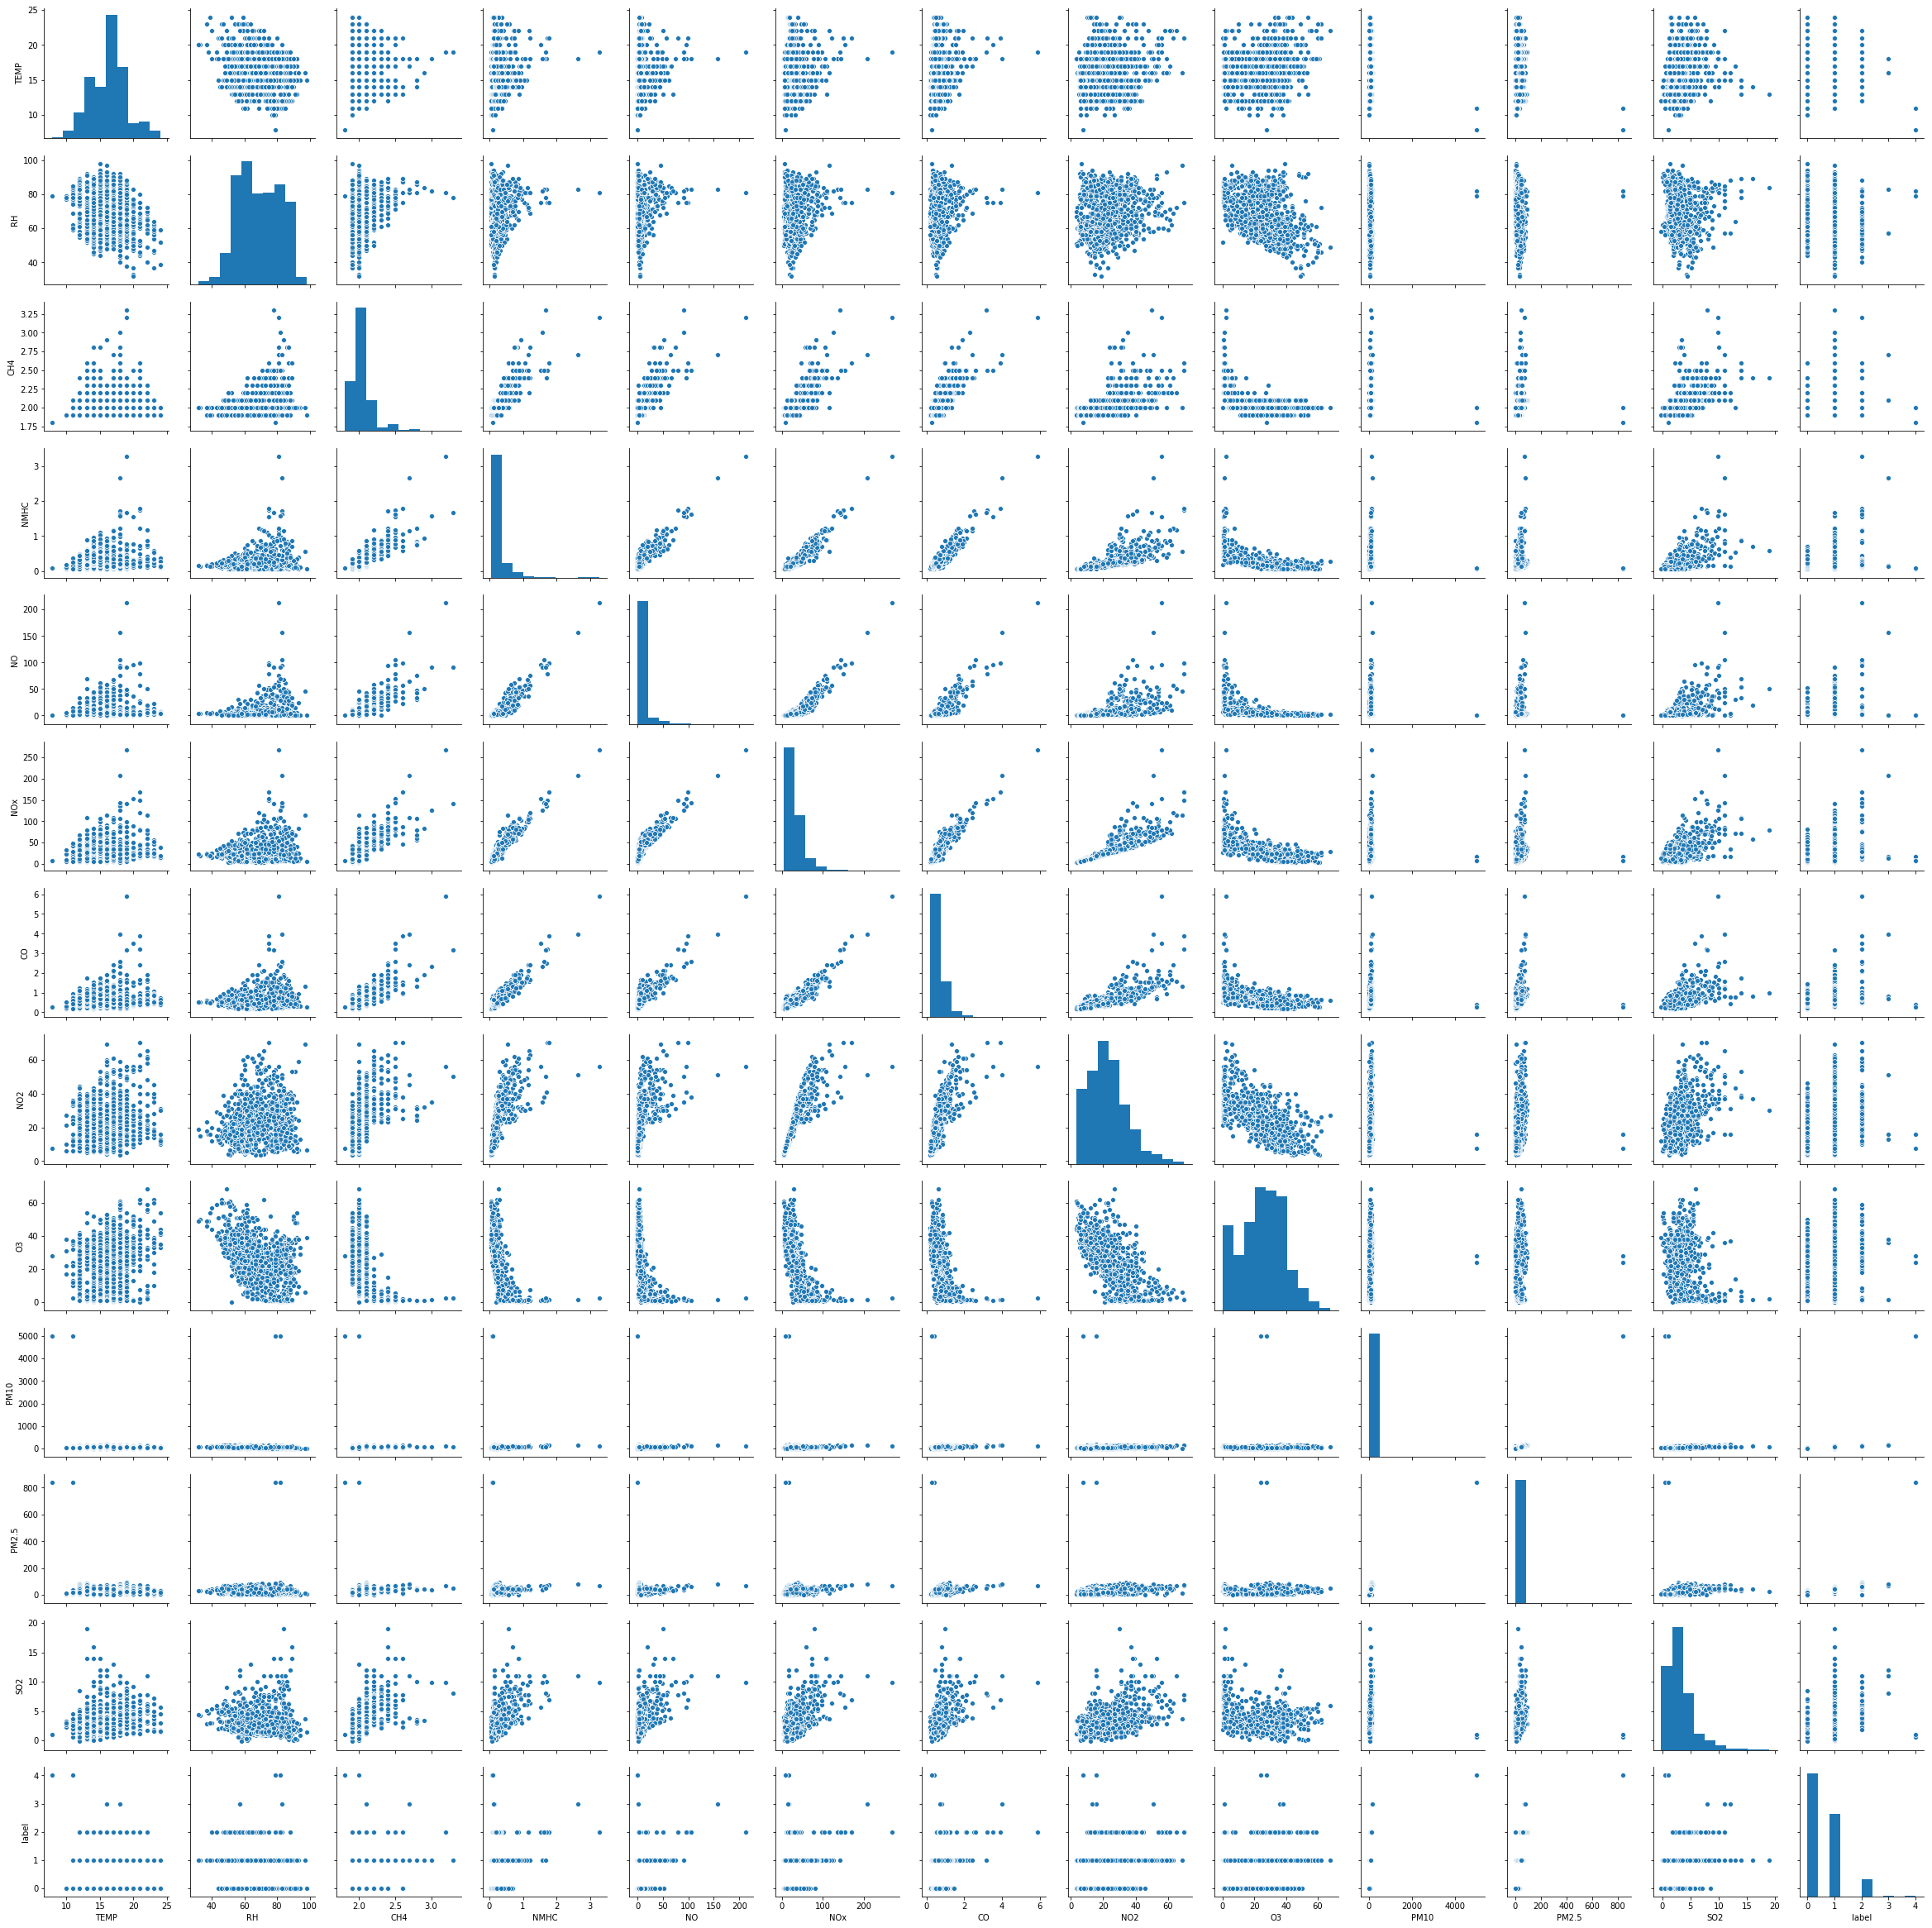

In [43]:
sns.pairplot(data)

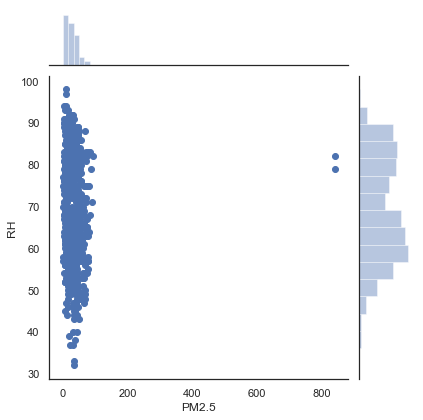

In [44]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='PM2.5',y='RH',data=data)

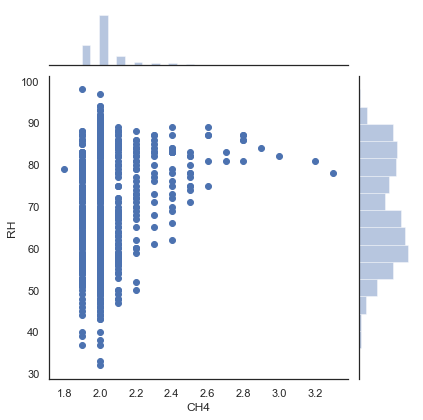

In [45]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='RH',data=data)

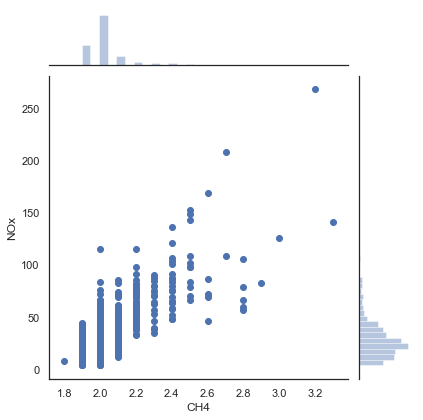

In [46]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='NOx',data=data)

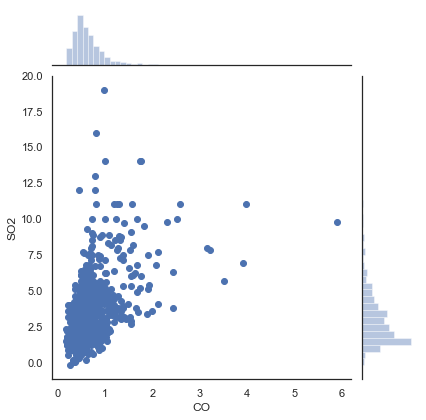

In [47]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CO',y='SO2',data=data)

In [ ]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='O3',data=data)

In [ ]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='TEMP',y='RH',data=data)

In [ ]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='CO',data=data)

# Train Test Split

Now its time to split our data into a training set and a testing set!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.to_excel('Traning_Testing/X_train.xlsx')
X_test.to_excel('Traning_Testing/X_test.xlsx')
y_train.to_excel('Traning_Testing/y_train.xlsx')
y_test.to_excel('Traning_Testing/y_test.xlsx')

# Training the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

# Predictions

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
predictions

**Now create a classification report from the results**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
accRF = accuracy_score(y_true=y_test, y_pred= predictions)
print("Overall accuracy of Random Forest model using test-set is : %f" %(accRF*100))

In [ ]:
print(confusion_matrix(y_test,predictions))

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel='linear')

In [ ]:
model_svm.fit(X_train, y_train)

In [ ]:
predictionSVM = model_svm.predict(X_test)

In [ ]:
accSVM = accuracy_score(y_true = y_test, y_pred = predictionSVM)
print("Overall accuracy of SVM model using test-set is : %f" %(accSVM*100))

In [ ]:
classificationReportSVM = classification_report(y_test, predictionSVM)

In [ ]:
print(confusion_matrix(y_test,predictionSVM))

In [ ]:
li_acc = [(accRF*100), (accSVM*100)]
li_classifier = ["RF", "SVM"]

In [ ]:
print(li_acc)
plt.figure(figsize=(10,6),dpi=80)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
ax_data = sns.barplot(li_classifier, y=li_acc)
ax_data.yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.show()

In [ ]:
CO = X_test.CO
SO2 = X_test.SO2
NO2 = X_test.NO2
O3 = X_test.O3
PM10 = X_test.PM10

In [ ]:
CO_mean = CO.mean()
SO2_mean = SO2.mean()
NO2_mean = NO2.mean()
O3_mean = O3.mean()
PM10_mean = PM10.mean()

In [ ]:
def checkCo(q):
    v = ''
    if q > 0 and q <= 1:
        v = "Good"
    elif q > 1.1 and q <= 2.0:
        v = "Satisfactory"
    elif q > 2.1 and q <= 10:
        v = "Moderately Polluted"
    elif q > 10 and q <= 17:
        v = "Poor"
    elif q > 17 and q <= 34:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('CO-->  %2.3f    %s' %(q, v))
        

In [ ]:
def checkSO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 380:
        v = "Moderately Polluted"
    elif q > 381 and q <= 800:
        v = "Poor"
    elif q > 801 and q <= 1600:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('SO2-->  %2.3f    %s' %(q, v))

In [ ]:
def checkNO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 180:
        v = "Moderately Polluted"
    elif q > 181 and q <= 280:
        v = "Poor"
    elif q > 281 and q <= 400:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('NO2-->  %2.3f    %s' %(q, v))

In [ ]:
def checkO3(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 168:
        v = "Moderately Polluted"
    elif q > 169 and q <= 208:
        v = "Poor"
    elif q > 209 and q <= 748:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('O3-->  %2.3f    %s' %(q, v))

In [ ]:
def checkPM(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('PM-->  %2.3f    %s' %(q, v))

# Air Quality Analysis

In [ ]:
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/1a.png')
plt.axis('off')
plt.imshow(image)
plt.show()

### Real Time

In [ ]:
x_test_df = pd.DataFrame([[16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0]])

In [ ]:
pre = rfc.predict(x_test_df)

In [ ]:
print(pre)

In [ ]:
temp_mean = data['TEMP'].mean()
rh_mean = data['RH'].mean()
ch4_mean = data['CH4'].mean()
nmhc_mean = data['NMHC'].mean()
no_mean = data['NO'].mean()
nox_mean = data['NOx'].mean()
co_mean = data['CO'].mean()
no2_mean = data['NO2'].mean()
o3_mean = data['O3'].mean()
pm10_mean = data['PM10'].mean()
pm25_mean = data['PM2.5'].mean()
so2_mean = data['SO2'].mean()

In [ ]:
li_x = ["TEMP", 'RH', 'CH4', 'NMHC', 'NO', 'NOx', 'CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']
li_y = [temp_mean,rh_mean,ch4_mean,nmhc_mean,no_mean,nox_mean,co_mean,no2_mean,o3_mean,pm10_mean,pm25_mean,so2_mean]

In [ ]:
print(li_y)
plt.figure(figsize=(10,6),dpi=80)
plt.xlabel("")
plt.ylabel("")
plt.title("")
sns.barplot(x=li_x, y=li_y)
plt.show()